## [Clustering with Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)  & [Clustering with Spark](https://spark.apache.org/docs/latest/ml-clustering.html)  

This notebook describes clustering algorithms in [Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) and the [Spark MLlib](https://spark.apache.org/docs/latest/ml-clustering.html).  

### Table of Contents

+ K-means
+ Input Columns
+ Output Columns
+ Latent Dirichlet allocation (LDA)
+ Bisecting k-means
+ Gaussian Mixture Model (GMM)
+ Input Columns
+ Output Columns
+ Power Iteration Clustering (PIC)

##### Disabling MLFlow

In [0]:
import mlflow
mlflow.autolog(disable=True)

##### Checking file paths

In [0]:
!ls 

08_Clustering_with_Spark	 11b_Training_Pandas_UDFs
08_Clustering_with_Spark.ipynb	 11b_Training_Pandas_UDFs.ipynb
09_MLflow_Tracking		 12_MLlib_Deployment_Options
09_MLflow_Tracking.ipynb	 12_MLlib_Deployment_Options.ipynb
10_Hyperopt			 13_Capstone_Project
10_Hyperopt.ipynb		 13_Capstone_Project.ipynb
11a_Inference_Pandas_UDFs	 data
11a_Inference_Pandas_UDFs.ipynb


##### Checking home folder

In [0]:
import os
os.getcwd()

# Notes on reading files for Spark within Databricks
# https://docs.databricks.com/_static/notebooks/files-in-repos.html

Out[51]: '/Workspace/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1'

### 1 - Kmeans Clustering

##### Examining Data

In [0]:
!head ./data/kmeans_data.txt

0.0 0.0 0.0
0.1 0.1 0.1
0.2 0.2 0.2
9.0 9.0 9.0
9.1 9.1 9.1
9.2 9.2 9.2


In [0]:
!head ./data/sample_kmeans_data.txt

0 1:0.0 2:0.0 3:0.0
1 1:0.1 2:0.1 3:0.1
2 1:0.2 2:0.2 3:0.2
3 1:9.0 2:9.0 3:9.0
4 1:9.1 2:9.1 3:9.1
5 1:9.2 2:9.2 3:9.2


#### 1.1 - [k-means](http://en.wikipedia.org/wiki/K-means_clustering) with Scikit-Learn

Kmeans is one of the most commonly used clustering algorithms that clusters the data points into a predefined number of clusters.

[Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html) implements many forms of clustering

In [0]:
!pip install -U -q scikit-learn

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
X = np.loadtxt(f"{os.getcwd()}/data/kmeans_data.txt", dtype="float")
print(X)

[[0.  0.  0. ]
 [0.1 0.1 0.1]
 [0.2 0.2 0.2]
 [9.  9.  9. ]
 [9.1 9.1 9.1]
 [9.2 9.2 9.2]]


In [0]:
kmeans = KMeans(n_clusters=2, 
                init='k-means++',
                random_state=0)
kmeans.fit(X)
kmeans.labels_

/local_disk0/.ephemeral_nfs/envs/pythonEnv-7aa55c4f-825d-46f7-a53f-a960cb042d8c/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Out[57]: array([1, 1, 1, 0, 0, 0], dtype=int32)

#### 1.1.1 - [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)  

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

/local_disk0/.ephemeral_nfs/envs/pythonEnv-7aa55c4f-825d-46f7-a53f-a960cb042d8c/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/local_disk0/.ephemeral_nfs/envs/pythonEnv-7aa55c4f-825d-46f7-a53f-a960cb042d8c/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
For n_clusters = 2 The average silhouette_score is : 0.9851838132737026
For n_clusters = 3 The average silhouette_score is : 0.5758419872886181
/local_disk0/.ephemeral_nfs/envs/pythonEnv-7aa55c4f-825d-46f7-a53f-a960cb042d8c/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expli

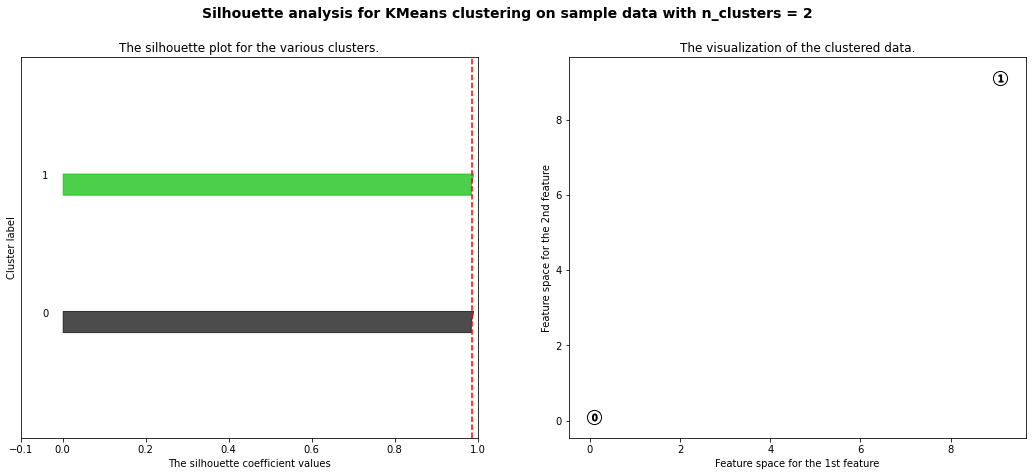

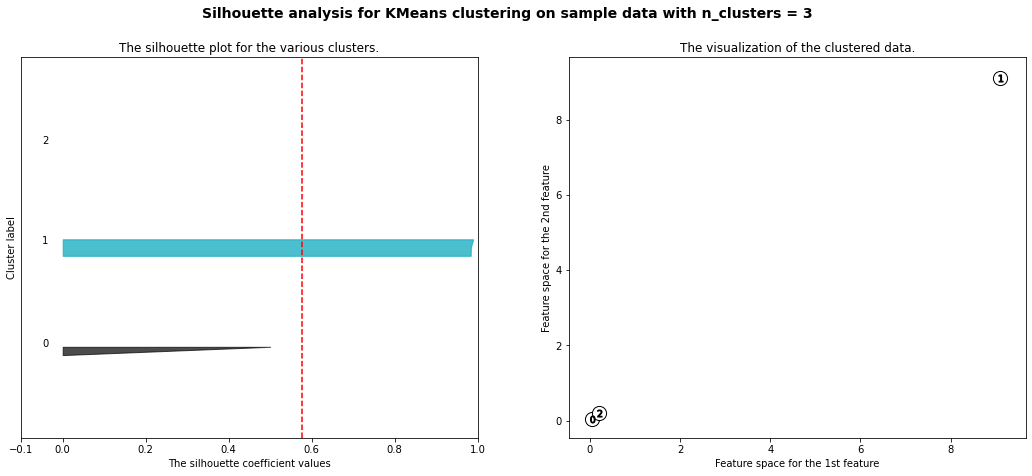

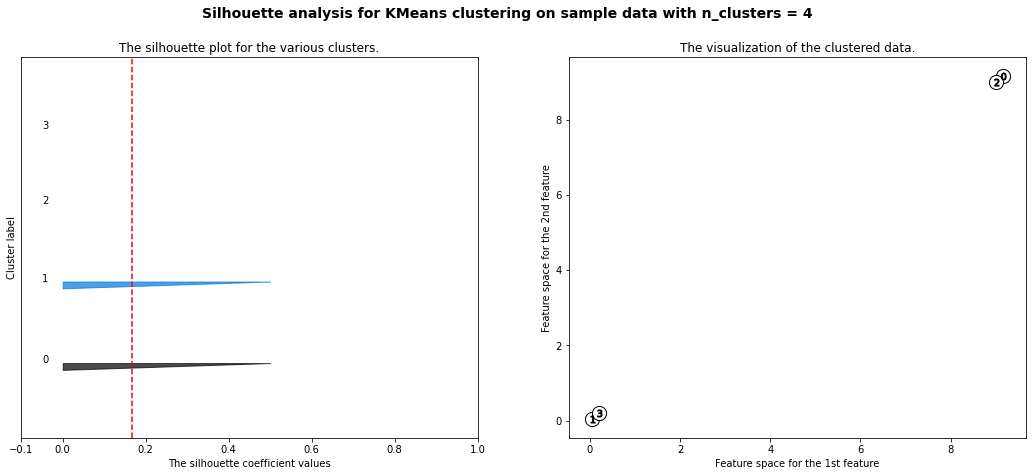

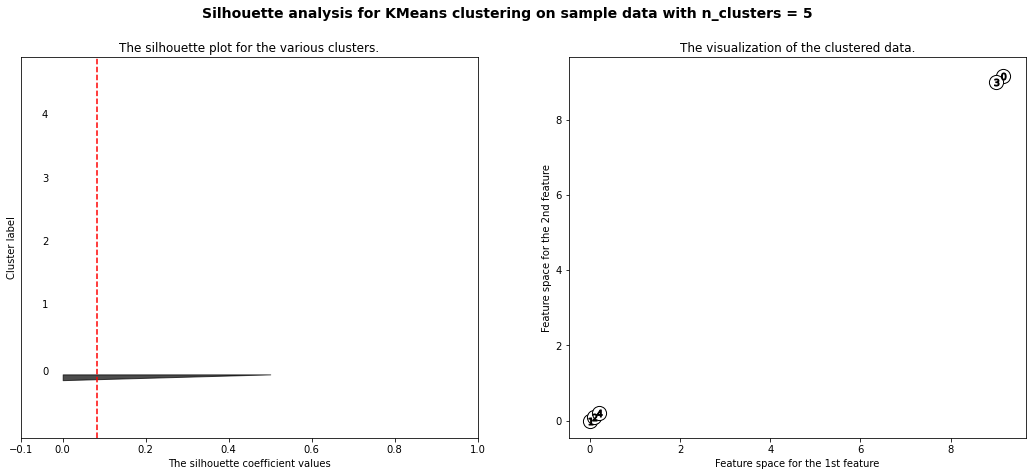

In [0]:
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### 1.2 - [K-means with Spark](https://github.com/apache/spark/blob/master/examples/src/main/python/mllib/k_means_example.py)  

The MLlib implementation includes a parallelized variant of the k-means++ method called kmeans||.

KMeans is implemented as an Estimator and generates a KMeansModel as the base model.


<h3 id="input-columns">Input Columns</h3>

<table class="table">
  <thead>
    <tr>
      <th align="left">Param name</th>
      <th align="left">Type(s)</th>
      <th align="left">Default</th>
      <th align="left">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>featuresCol</td>
      <td>Vector</td>
      <td>"features"</td>
      <td>Feature vector</td>
    </tr>
  </tbody>
</table>

<h3 id="output-columns">Output Columns</h3>

<table class="table">
  <thead>
    <tr>
      <th align="left">Param name</th>
      <th align="left">Type(s)</th>
      <th align="left">Default</th>
      <th align="left">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>predictionCol</td>
      <td>Int</td>
      <td>"prediction"</td>
      <td>Predicted cluster center</td>
    </tr>
  </tbody>
</table>

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load(f"file:{os.getcwd()}/data/sample_kmeans_data.txt")

# Trains a k-means model.
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

# Make predictions
predictions = model.transform(dataset)

predictions.display()

label,features,prediction
0.0,"Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())",1
1.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(0.1, 0.1, 0.1))",1
2.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(0.2, 0.2, 0.2))",1
3.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(9.0, 9.0, 9.0))",0
4.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(9.1, 9.1, 9.1))",0
5.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(9.2, 9.2, 9.2))",0


#### 1.2.1 - [Silhouette analysis](https://spark.apache.org/docs/latest/ml-clustering.html#k-means) with Spark

In [0]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9997530305375207


In [0]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


### 2 - [Latent Dirichlet Allocation](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation)   
Latent Dirichlet Allocation is a generative probabilistic model for collections of discrete dataset such as text corpora.  
It is also a topic model that is used for discovering abstract topics from a collection of documents.  

The graphical model of LDA is a three-level generative model:

![](https://scikit-learn.org/stable/_images/lda_model_graph.png)

Note on notations presented in the graphical model above, which can be found in Hoffman et al. (2013):

+ The corpus is a collection of  documents.
+ A document is a sequence of  words.
+ There are  topics in the corpus.
+ The boxes represent repeated sampling.

In the graphical model, each node is a random variable and has a role in the generative process. A shaded node indicates an observed variable and an unshaded node indicates a hidden (latent) variable. In this case, words in the corpus are the only data that we observe. The latent variables determine the random mixture of topics in the corpus and the distribution of words in the documents. The goal of LDA is to use the observed words to infer the hidden topic structure.

When modeling text corpora, the model assumes the following generative process for a corpus with  documents and  topics, with  corresponding to n_components in the API:

Examining Data

In [0]:
!head ./data/sample_lda_data.txt

1 2 6 0 2 3 1 1 0 0 3
1 3 0 1 3 0 0 2 0 0 1
1 4 1 0 0 4 9 0 1 2 0
2 1 0 3 0 0 5 0 2 3 9
3 1 1 9 3 0 2 0 0 1 3
4 2 0 3 4 5 1 1 1 4 0
2 1 0 3 0 0 5 0 2 2 9
1 1 1 9 2 1 2 0 0 1 3
4 4 0 3 4 2 1 3 0 0 0
2 8 2 0 3 0 2 0 2 7 2


In [0]:
!head ./data/sample_lda_libsvm_data.txt

0 1:1 2:2 3:6 4:0 5:2 6:3 7:1 8:1 9:0 10:0 11:3
1 1:1 2:3 3:0 4:1 5:3 6:0 7:0 8:2 9:0 10:0 11:1
2 1:1 2:4 3:1 4:0 5:0 6:4 7:9 8:0 9:1 10:2 11:0
3 1:2 2:1 3:0 4:3 5:0 6:0 7:5 8:0 9:2 10:3 11:9
4 1:3 2:1 3:1 4:9 5:3 6:0 7:2 8:0 9:0 10:1 11:3
5 1:4 2:2 3:0 4:3 5:4 6:5 7:1 8:1 9:1 10:4 11:0
6 1:2 2:1 3:0 4:3 5:0 6:0 7:5 8:0 9:2 10:2 11:9
7 1:1 2:1 3:1 4:9 5:2 6:1 7:2 8:0 9:0 10:1 11:3
8 1:4 2:4 3:0 4:3 5:4 6:2 7:1 8:3 9:0 10:0 11:0
9 1:2 2:8 3:2 4:0 5:3 6:0 7:2 8:0 9:2 10:7 11:2


#### 2.1 - [Latent Dirichlet allocation (LDA) with Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

In [0]:
X = np.loadtxt(f"{os.getcwd()}/data/sample_lda_data.txt", dtype="float")
print(X)

[[1. 2. 6. 0. 2. 3. 1. 1. 0. 0. 3.]
 [1. 3. 0. 1. 3. 0. 0. 2. 0. 0. 1.]
 [1. 4. 1. 0. 0. 4. 9. 0. 1. 2. 0.]
 [2. 1. 0. 3. 0. 0. 5. 0. 2. 3. 9.]
 [3. 1. 1. 9. 3. 0. 2. 0. 0. 1. 3.]
 [4. 2. 0. 3. 4. 5. 1. 1. 1. 4. 0.]
 [2. 1. 0. 3. 0. 0. 5. 0. 2. 2. 9.]
 [1. 1. 1. 9. 2. 1. 2. 0. 0. 1. 3.]
 [4. 4. 0. 3. 4. 2. 1. 3. 0. 0. 0.]
 [2. 8. 2. 0. 3. 0. 2. 0. 2. 7. 2.]
 [1. 1. 1. 9. 0. 2. 2. 0. 0. 3. 3.]
 [4. 1. 0. 0. 4. 5. 1. 3. 0. 1. 0.]]


In [0]:
# X is a feature matrix of token counts, similar to what CountVectorizer would produce on text.

lda = LatentDirichletAllocation(n_components=10,
                                random_state=0)
lda.fit(X)

# get topics for some given samples:
df = pd.DataFrame(lda.transform(X))
df

,0,1,2,3,4,5,6,7,8,9
0,0.954991,0.005001,0.005000,0.005002,0.005002,0.005000,0.005001,0.005002,0.005001,0.005000
1,0.008335,0.008336,0.008333,0.008335,0.924990,0.008333,0.008335,0.008334,0.008335,0.008333
2,0.004349,0.004349,0.004348,0.004349,0.004348,0.004348,0.004349,0.960863,0.004350,0.004348
3,0.003847,0.965380,0.003846,0.003847,0.003847,0.003846,0.003847,0.003847,0.003847,0.003846
4,0.004168,0.962492,0.004167,0.004168,0.004168,0.004167,0.004168,0.004167,0.004168,0.004167
5,0.003847,0.003847,0.003846,0.003848,0.003847,0.003846,0.965378,0.003847,0.003847,0.003846
6,0.004000,0.963996,0.004000,0.004000,0.004001,0.004000,0.004001,0.004001,0.004001,0.004000
7,0.004547,0.959082,0.004545,0.004547,0.004547,0.004545,0.004547,0.004547,0.004547,0.004545
8,0.004546,0.004547,0.004545,0.376772,0.586859,0.004545,0.004547,0.004547,0.004546,0.004545
9,0.003449,0.003449,0.003448,0.003449,0.003449,0.003448,0.003449,0.003449,0.968961,0.003448


#### 2.2 - [Latent Dirichlet allocation with Spark (LDA)](https://github.com/apache/spark/blob/master/examples/src/main/python/ml/lda_example.py)  

LDA is implemented as an Estimator that supports both EMLDAOptimizer and OnlineLDAOptimizer, and generates a LDAModel as the base model.  
Expert users may cast a LDAModel generated by EMLDAOptimizer to a DistributedLDAModel if needed.

In [0]:
from pyspark.ml.clustering import LDA

# Loads data.
dataset = spark.read.format("libsvm").load(f"file:{os.getcwd()}/data/sample_lda_libsvm_data.txt")

# Trains a LDA model.
lda = LDA(k=10, maxIter=10)
model = lda.fit(dataset)

ll = model.logLikelihood(dataset)
lp = model.logPerplexity(dataset)
print("The lower bound on the log likelihood of the entire corpus: " + str(ll))
print("The upper bound on perplexity: " + str(lp))

The lower bound on the log likelihood of the entire corpus: -797.5200544004555
The upper bound on perplexity: 3.0673848246171365


In [0]:
# Describe topics.
topics = model.describeTopics(5)
print("The topics described by their top-weighted terms:")
topics.show(truncate=False)

The topics described by their top-weighted terms:
+-----+----------------+---------------------------------------------------------------------------------------------------------+
|topic|termIndices     |termWeights                                                                                              |
+-----+----------------+---------------------------------------------------------------------------------------------------------+
|0    |[1, 3, 4, 6, 10]|[0.10368082673401043, 0.10246920001021176, 0.09945342991888821, 0.09915328178530704, 0.0931744312775116] |
|1    |[0, 5, 9, 8, 6] |[0.1076176051626867, 0.09801051465962088, 0.09705006627909334, 0.09429728279914042, 0.0930279667464316]  |
|2    |[5, 10, 9, 2, 7]|[0.09817190617101527, 0.0981118296756393, 0.09564406780739915, 0.09251034969020704, 0.09126626968360979] |
|3    |[5, 10, 2, 3, 8]|[0.10428733568856435, 0.10200642097504846, 0.09787247160826047, 0.09695178648429592, 0.09501649234788634]|
|4    |[5, 8, 2, 3, 10]|[0.106103

In [0]:
# Shows the result
transformed = model.transform(dataset)
#transformed.show(truncate=False)
transformed.display()

label,features,topicDistribution
0.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 2, 4, 5, 6, 7, 10), values -> List(1.0, 2.0, 6.0, 2.0, 3.0, 1.0, 1.0, 3.0))","Map(vectorType -> dense, length -> 10, values -> List(0.004676952344250045, 0.004676968395495595, 0.004676950578410848, 0.004676970332583484, 0.004676967419293877, 0.0046769759336480555, 0.00586884662388327, 0.004676918960470165, 0.9567155317134576, 0.004676917698507178))"
1.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 3, 4, 7, 10), values -> List(1.0, 3.0, 1.0, 3.0, 2.0, 1.0))","Map(vectorType -> dense, length -> 10, values -> List(0.007805785111705882, 0.007805628378410143, 0.007805672976519763, 0.007805633036666408, 0.0078056512171248245, 0.0078057068437358225, 0.9296064359680699, 0.007805670690530401, 0.007948154376537068, 0.0078056614006996585))"
2.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 2, 5, 6, 8, 9), values -> List(1.0, 4.0, 1.0, 4.0, 9.0, 1.0, 2.0))","Map(vectorType -> dense, length -> 10, values -> List(0.004065785807285062, 0.004065796483945533, 0.004065741735817013, 0.004065754454676408, 0.004065789124629428, 0.004065756363747333, 0.9633338428475929, 0.004065766920250332, 0.004140035607639875, 0.004065730654416079))"
3.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 3, 6, 8, 9, 10), values -> List(2.0, 1.0, 3.0, 5.0, 2.0, 3.0, 9.0))","Map(vectorType -> dense, length -> 10, values -> List(0.003595999611587824, 0.0035959934673908856, 0.003595986426016544, 0.003596001942206489, 0.0035960042711613415, 0.0035959699075005618, 0.9675706109074504, 0.0035959527682424314, 0.003661498769496744, 0.0035959819289466694))"
4.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 2, 3, 4, 6, 9, 10), values -> List(3.0, 1.0, 1.0, 9.0, 3.0, 2.0, 1.0, 3.0))","Map(vectorType -> dense, length -> 10, values -> List(0.003896056145092278, 0.0038960230822260213, 0.003896021727591732, 0.0038960395775907686, 0.0038960305976958186, 0.003896041370270874, 0.9648646437935958, 0.003896005371138772, 0.003967131081227989, 0.00389600725356977))"
5.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 3, 4, 5, 6, 7, 8, 9), values -> List(4.0, 2.0, 3.0, 4.0, 5.0, 1.0, 1.0, 1.0, 4.0))","Map(vectorType -> dense, length -> 10, values -> List(0.0035958512635438883, 0.003595871053475638, 0.00359585118699201, 0.0035958415673139612, 0.0035958614858202405, 0.00359585244224661, 0.9675718310622518, 0.003595862687536621, 0.0036613294104646645, 0.0035958478403545777))"
6.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 3, 6, 8, 9, 10), values -> List(2.0, 1.0, 3.0, 5.0, 2.0, 2.0, 9.0))","Map(vectorType -> dense, length -> 10, values -> List(0.0037400901498766165, 0.0037400772487206613, 0.003740070441270972, 0.003740090492304099, 0.00374009199048886, 0.003740054667297089, 0.9662712134927176, 0.0037400345829021095, 0.0038082130712644995, 0.0037400638631574046))"
7.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 2, 3, 4, 5, 6, 9, 10), values -> List(1.0, 1.0, 1.0, 9.0, 2.0, 1.0, 2.0, 1.0, 3.0))","Map(vectorType -> dense, length -> 10, values -> List(0.004250912590410982, 0.004250864880548274, 0.004250873025195017, 0.004250902392318307, 0.004250896259490729, 0.004250894608318159, 0.9616644557550442, 0.004250858331703485, 0.004328484876898299, 0.0042508572800724845))"
8.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 3, 4, 5, 6, 7), values -> List(4.0, 4.0, 3.0, 4.0, 2.0, 1.0, 3.0))","Map(vectorType -> dense, length -> 10, values -> List(0.004250932615766632, 0.004250898540265684, 0.0042508952107341985, 0.00425086861721875, 0.004250884020041738, 0.004250912696613805, 0.9616644057735709, 0.004250906355026676, 0.004328414896664478, 0.004250881274096983))"
9.0,"Map(vectorType -> sparse, length -> 11, indices -> List(0, 1, 2, 4, 6, 8, 9, 10), values -> List(2.0, 8.0, 2.0, 3.0, 2.0, 2.0, 7.0, 2.0))","Map(vectorType -> dense, length -> 10, values -> List(0.003223448053

### 3 - [Hierarchical Cluster](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. See the [Wikipedia page](https://en.wikipedia.org/wiki/Hierarchical_clustering) for more details.  

Bisecting k-means is a kind of [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) using a divisive (or “top-down”) approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.  

Bisecting K-means can often be much faster than regular K-means, but it will generally produce a different clustering.

#### 3.1 - [Bisecting k-means with Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html#sklearn.cluster.BisectingKMeans)

In [0]:
from sklearn.cluster import BisectingKMeans

In [0]:
X = np.loadtxt(f"{os.getcwd()}/data/kmeans_data.txt", dtype="float")
print(X)

[[0.  0.  0. ]
 [0.1 0.1 0.1]
 [0.2 0.2 0.2]
 [9.  9.  9. ]
 [9.1 9.1 9.1]
 [9.2 9.2 9.2]]


In [0]:
bisect_means = BisectingKMeans(n_clusters=2, random_state=0).fit(X)
print(bisect_means.labels_)
print(bisect_means.cluster_centers_)

[1 1 1 0 0 0]
[[9.1 9.1 9.1]
 [0.1 0.1 0.1]]


#### 3.2 - [Bisecting k-means with Spark](https://github.com/apache/spark/blob/master/examples/src/main/python/ml/bisecting_k_means_example.py)

  

BisectingKMeans is implemented as an Estimator and generates a BisectingKMeansModel as the base model.

In [0]:
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# Loads data.
dataset = spark.read.format("libsvm").load(f"file:{os.getcwd()}/data/sample_kmeans_data.txt")

# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(dataset)

# Make predictions
predictions = model.transform(dataset)
predictions.display()

label,features,prediction
0.0,"Map(vectorType -> sparse, length -> 3, indices -> List(), values -> List())",0
1.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(0.1, 0.1, 0.1))",0
2.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(0.2, 0.2, 0.2))",0
3.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(9.0, 9.0, 9.0))",1
4.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(9.1, 9.1, 9.1))",1
5.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0, 1, 2), values -> List(9.2, 9.2, 9.2))",1


In [0]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9997530305375207


In [0]:
# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

Cluster Centers: 
[0.1 0.1 0.1]
[9.1 9.1 9.1]


### 4 - Gaussian Mixture Models  

A [Gaussian Mixture Model](http://en.wikipedia.org/wiki/Mixture_model#Multivariate_Gaussian_mixture_model) represents a composite distribution whereby points are drawn from one of k Gaussian sub-distributions, each with its own probability.

#### 4.1 - [Gaussian Mixture Model (GMM) with Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data. A GaussianMixture.fit method is provided that learns a Gaussian Mixture Model from train data.

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
X = np.loadtxt(f"{os.getcwd()}/data/kmeans_data.txt", dtype="float")
print(X)

[[0.  0.  0. ]
 [0.1 0.1 0.1]
 [0.2 0.2 0.2]
 [9.  9.  9. ]
 [9.1 9.1 9.1]
 [9.2 9.2 9.2]]


In [0]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

print(gm.means_)
print(gm.predict([[0, 0, 3], [12, 3, 21]]))

[[9.1 9.1 9.1]
 [0.1 0.1 0.1]]
[1 0]


#### 4.2 - [Gaussian Mixture Model (GMM) with Spark](https://github.com/apache/spark/blob/master/examples/src/main/python/ml/gaussian_mixture_example.py)

  
The spark.ml implementation uses the [expectation-maximization](http://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) algorithm to induce the maximum-likelihood model given a set of samples.  

GaussianMixture is implemented as an Estimator and generates a GaussianMixtureModel as the base model.  

<h3 id="input-columns-1">Input Columns</h3>

<table class="table">
  <thead>
    <tr>
      <th align="left">Param name</th>
      <th align="left">Type(s)</th>
      <th align="left">Default</th>
      <th align="left">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>featuresCol</td>
      <td>Vector</td>
      <td>"features"</td>
      <td>Feature vector</td>
    </tr>
  </tbody>
</table>

<h3 id="output-columns-1">Output Columns</h3>

<table class="table">
  <thead>
    <tr>
      <th align="left">Param name</th>
      <th align="left">Type(s)</th>
      <th align="left">Default</th>
      <th align="left">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>predictionCol</td>
      <td>Int</td>
      <td>"prediction"</td>
      <td>Predicted cluster center</td>
    </tr>
    <tr>
      <td>probabilityCol</td>
      <td>Vector</td>
      <td>"probability"</td>
      <td>Probability of each cluster</td>
    </tr>
  </tbody>
</table>

In [0]:
from pyspark.ml.clustering import GaussianMixture

# loads data
dataset = spark.read.format("libsvm").load(f"file:{os.getcwd()}/data/sample_kmeans_data.txt")

gmm = GaussianMixture().setK(2).setSeed(538009335)
model = gmm.fit(dataset)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.display()

Gaussians shown as a DataFrame: 


mean,cov
"Map(vectorType -> dense, length -> 3, values -> List(0.10000000000001552, 0.10000000000001552, 0.10000000000001552))",0.006666666666806454 0.006666666666806454 0.006666666666806454 0.006666666666806454 0.006666666666806454 0.006666666666806454 0.006666666666806454 0.006666666666806454 0.006666666666806454
"Map(vectorType -> dense, length -> 3, values -> List(9.099999999999984, 9.099999999999984, 9.099999999999984))",0.006666666666812185 0.006666666666812185 0.006666666666812185 0.006666666666812185 0.006666666666812185 0.006666666666812185 0.006666666666812185 0.006666666666812185 0.006666666666812185


### 5 - [Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering)  

In multivariate statistics, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

#### 5.1 - [Spectral Clustering with Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

In [0]:
from sklearn.cluster import SpectralClustering

In [0]:
X = np.array([[0, 1, 1.0],
              [0, 2, 1.0],
              [1, 2, 1.0],
              [3, 4, 1.0],
              [4, 0, 0.1]])
X

Out[81]: array([[0. , 1. , 1. ],
       [0. , 2. , 1. ],
       [1. , 2. , 1. ],
       [3. , 4. , 1. ],
       [4. , 0. , 0.1]])

In [0]:
clustering = SpectralClustering(n_clusters=2,
                                assign_labels='kmeans',
                                random_state=0).fit(X)


print(clustering)

print(clustering.labels_)

SpectralClustering(n_clusters=2, random_state=0)
[0 0 0 0 1]


#### 5.2 - [Power Iteration Clustering (PIC) with Spark](https://github.com/apache/spark/blob/master/examples/src/main/python/ml/power_iteration_clustering_example.py)

Power Iteration Clustering (PIC) is a scalable graph clustering algorithm developed by [Lin and Cohen](http://www.cs.cmu.edu/~frank/papers/icml2010-pic-final.pdf). From the abstract: PIC finds a very low-dimensional embedding of a dataset using truncated power iteration on a normalized pair-wise similarity matrix of the data.

spark.ml’s PowerIterationClustering implementation takes the following parameters:

+ k: the number of clusters to create
+ initMode: param for the initialization algorithm
+ maxIter: param for maximum number of iterations
+ srcCol: param for the name of the input column for source vertex IDs
+ dstCol: name of the input column for destination vertex IDs
+ weightCol: Param for weight column name

In [0]:
from pyspark.ml.clustering import PowerIterationClustering

df = spark.createDataFrame([
    (0, 1, 1.0),
    (0, 2, 1.0),
    (1, 2, 1.0),
    (3, 4, 1.0),
    (4, 0, 0.1)
], ["src", "dst", "weight"])

pic = PowerIterationClustering(k=2, 
                               maxIter=20, 
                               initMode="degree", 
                               weightCol="weight")

# Shows the cluster assignment
pic.assignClusters(df).display()

id,cluster
4,0
0,1
1,1
2,1
3,0
